# More Emigration Trends

I was curious about where people are going when they leave Denmark, and who they are. I got data from VAN2AAR and VAN1AAR on https://statbank.dk/

In [1]:
# Importing my libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.sankey import Sankey
import matplotlib.animation as animation

import squarify
import matplotlib.cm as cm

# Ukraine
Ukraine is a popular destination for people leaving Denmark. As you can see, most people moving to Ukraine are from Ukraine.

In [2]:


ukraine_df = pd.read_csv('destination ukraine.csv', header=None, encoding='ISO-8859-1')
ukraine_df.columns = ['Destination', 'Year', 'Citizenship', 'Region Hovedstaden',	'Region Sjælland',	'Region Syddanmark',	'Region Midtjylland',	'Region Nordjylland']

ukraine_df.head()

,Destination,Year,Citizenship,Region Hovedstaden,Region Sjælland,Region Syddanmark,Region Midtjylland,Region Nordjylland
0,Ukraine,2023,Ukraine,928,678,960,924,631
1,Ukraine,2023,Non-Ukrainians,9,13,7,6,6


# Sweden and Germany
A lot of internationals are moving to Sweden and Germany. Who are they and where were they living before?

In [3]:
germany_df = pd.read_csv('destination germany.csv', header=None, encoding='ISO-8859-1')
germany_df.columns = ['Destination', 'Year', 'Citizenship', 'Region Hovedstaden',	'Region Sjælland',	'Region Syddanmark',	'Region Midtjylland',	'Region Nordjylland']

germany_df.head()

,Destination,Year,Citizenship,Region Hovedstaden,Region Sjælland,Region Syddanmark,Region Midtjylland,Region Nordjylland
0,Germany,2023,Germany,862,92,533,339,106
1,Germany,2023,Non-Germans,642,160,477,499,170


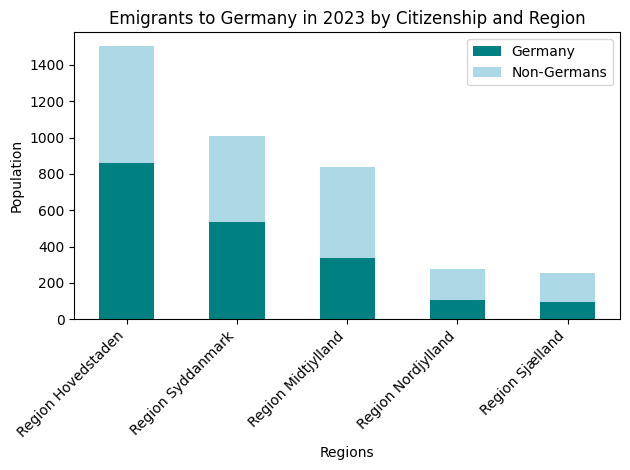

In [4]:
# Plotting
regions = ['Region Hovedstaden', 'Region Sjælland', 'Region Syddanmark', 'Region Midtjylland', 'Region Nordjylland']
citizenship = germany_df['Citizenship']

# Set bar width and colors
bar_width = 0.5
colors = ['teal', 'lightblue']

# Calculate total heights for each region
total_heights = germany_df.iloc[0, 3:] + germany_df.iloc[1, 3:]

# Sort regions by total heights in descending order
sorted_indices = total_heights.sort_values(ascending=False).index
sorted_regions = [region for region in sorted_indices]

# Set the position of bars on the x-axis (fixing the positions variable to use sorted regions)
positions_sorted = range(len(sorted_regions))

fig, ax = plt.subplots()

# Create stacked bar chart with sorted regions
ax.bar(positions_sorted, germany_df[sorted_regions].iloc[0], bar_width, label=citizenship[0], color=colors[0])
ax.bar(positions_sorted, germany_df[sorted_regions].iloc[1], bar_width, bottom=germany_df[sorted_regions].iloc[0], label=citizenship[1], color=colors[1])

# Adding labels and title
ax.set_xlabel('Regions')
ax.set_ylabel('Population')
ax.set_title('Emigrants to Germany in 2023 by Citizenship and Region')
ax.set_xticks(positions_sorted)  # Fix: positions_sorted should be used here instead of positions
ax.set_xticklabels(sorted_regions, rotation=45, ha="right")  # Fix: sorted_regions instead of regions
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [5]:
sweden_df = pd.read_csv('destination sweden.csv', header=None, encoding='ISO-8859-1')
sweden_df.columns = ['Destination', 'Year', 'Citizenship', 'Region Hovedstaden',	'Region Sjælland',	'Region Syddanmark',	'Region Midtjylland',	'Region Nordjylland']

sweden_df.head()

,Destination,Year,Citizenship,Region Hovedstaden,Region Sjælland,Region Syddanmark,Region Midtjylland,Region Nordjylland
0,Sweden,2023,Sweden,774,62,88,88,41
1,Sweden,2023,Non-Swedes,549,57,48,61,23


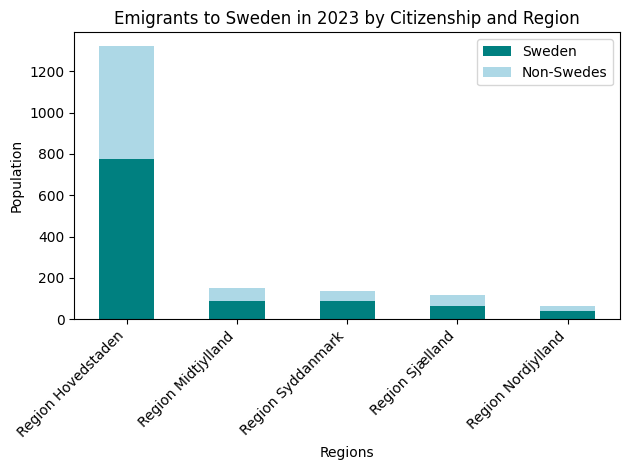

In [6]:
# Plotting
regions = ['Region Hovedstaden', 'Region Sjælland', 'Region Syddanmark', 'Region Midtjylland', 'Region Nordjylland']
citizenship = sweden_df['Citizenship']

# Set bar width and colors
bar_width = 0.5
colors = ['teal', 'lightblue']

# Calculate total heights for each region
total_heights = sweden_df.iloc[0, 3:] + germany_df.iloc[1, 3:]

# Sort regions by total heights in descending order
sorted_indices = total_heights.sort_values(ascending=False).index
sorted_regions = [region for region in sorted_indices]

# Set the position of bars on the x-axis (fixing the positions variable to use sorted regions)
positions_sorted = range(len(sorted_regions))

fig, ax = plt.subplots()

# Create stacked bar chart with sorted regions
ax.bar(positions_sorted, sweden_df[sorted_regions].iloc[0], bar_width, label=citizenship[0], color=colors[0])
ax.bar(positions_sorted, sweden_df[sorted_regions].iloc[1], bar_width, bottom=sweden_df[sorted_regions].iloc[0], label=citizenship[1], color=colors[1])

# Adding labels and title
ax.set_xlabel('Regions')
ax.set_ylabel('Population')
ax.set_title('Emigrants to Sweden in 2023 by Citizenship and Region')
ax.set_xticks(positions_sorted)  # Fix: positions_sorted should be used here instead of positions
ax.set_xticklabels(sorted_regions, rotation=45, ha="right")  # Fix: sorted_regions instead of regions
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Americans
Many Americans immigrate to Denmark but how many go back to the USA?
Let's look at the trends over the past 17 years

In [7]:
american_in_df = pd.read_csv('americans arriving.csv', header=None, encoding='ISO-8859-1')

year_columns = {i: 2006 + i for i in range(1, 18)}  # 1 corresponds to 2007, 17 to 2023


american_in_df.rename(columns=year_columns, inplace=True)

# Drop the 'citizenship' column (which is the first one)
american_in_df.drop(columns=[0], inplace=True)

# Adding 'Migration' column with the value 'immigration'
american_in_df['Migration'] = 'immigration'

# Rearrange columns so 'Migration' is the first column
american_in_df = american_in_df[['Migration'] + list(american_in_df.columns[:-1])]

american_out_df = pd.read_csv('americans going home.csv', header=None, encoding='ISO-8859-1')

american_out_df.drop(american_out_df.columns[0:3], axis=1, inplace=True)
year_columns = {i: 2006 + i -2 for i in range(2, 22)}
american_out_df.rename(columns=year_columns, inplace=True)
# Adding 'Migration' column with the value 'emigration'
american_out_df['Migration'] = 'emigration'

# Rearrange columns so 'Migration' is the first column
american_out_df = american_out_df[['Migration'] + list(american_out_df.columns[:-1])]

combined_df = pd.concat([american_in_df, american_out_df], ignore_index=True)
combined_df.head()

,Migration,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,immigration,1980,2264,2372,2665,2721,2848,3249,3290,3760,3859,3760,3946,3810,1392,1504,3829,4168
1,emigration,1176,1928,1822,2134,1415,3053,2562,2900,2429,3469,2480,3346,3318,882,640,2247,2995


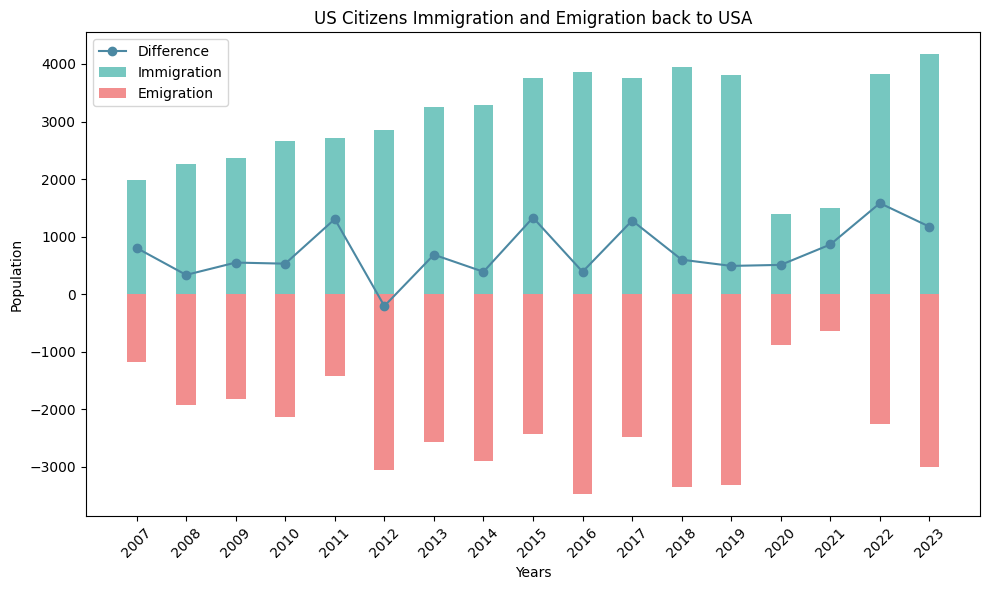

In [8]:

years_columns = combined_df.columns[1:18]  # Exclude 'Migration' 

# Separate immigration and emigration rows
immigration_df = combined_df[combined_df['Migration'] == 'immigration']
emigration_df = combined_df[combined_df['Migration'] == 'emigration']

# Calculate net migration: immigration - emigration
net_migration_values = immigration_df[years_columns].iloc[0] - emigration_df[years_columns].iloc[0]

# Set positions for the bars
years = np.arange(len(years_columns))

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot immigration as positive bars
ax.bar(years, immigration_df[years_columns].iloc[0], width=0.4, label='Immigration', color='#76c7c0')

# Plot emigration as negative bars
ax.bar(years, -emigration_df[years_columns].iloc[0], width=0.4, label='Emigration', color='#f28e8e')

# Plot net migration as a line on top
ax.plot(years, net_migration_values, label='Difference', color='#4b88a2', marker='o')

# Adding labels and title
ax.set_xlabel('Years')
ax.set_ylabel('Population')
ax.set_title('US Citizens Immigration and Emigration back to USA')
ax.set_xticks(years)
ax.set_xticklabels(years_columns, rotation=45)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


Denmark is attractive as a destination for American immigrants but many go back to the USA. Note: I'm not counting the "serial expat" figures where Americans go to another country after Denmark.

# Italians
I noticed something interesting in the statistics, in 2023, Italians were the biggest group expatriating to another country after trying Denmark. I wanted to dig into that a little bit. Where are they going?

In [9]:
# Source: VAN2AAR on https://statbank.dk/

italian_df = pd.read_csv('italian emigrants.csv', header=None, encoding='ISO-8859-1')

column_renaming = {
    0: 'Citizenship',
    1: 'Destination Country'
}

# Add year renaming to the dictionary
year_columns = {i: 2005 + i for i in range(2, 19)}  # Maps columns 2-18 to 2007-2023
column_renaming.update(year_columns)  # Update the dictionary with the year mapping

# Rename the columns in the DataFrame
italian_df.rename(columns=column_renaming, inplace=True)

italian_df.head()

,Citizenship,Destination Country,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Italy,Faroe Islands,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,Italy,Greenland,0,0,0,0,1,0,1,0,0,0,1,0,2,3,1,1,2
2,Italy,Albania,0,0,0,0,0,0,0,1,0,0,0,0,2,1,0,0,0
3,Italy,Andorra,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1
4,Italy,Belarus,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
# Specify the year columns (2007-2023) to sum
year_columns = [i for i in range(2007, 2024)]  # This will give the list of year columns (2007 to 2023)

# Calculate the row-wise sum for the year columns
italian_df['Total'] = italian_df[year_columns].sum(axis=1)

# Filter out rows where the total sum is less than 100, and create a copy to avoid the warning
filtered_df = italian_df[italian_df['Total'] >= 100].copy()

# Sort the dataframe by the 'Total' column in descending order
sorted_df = filtered_df.sort_values(by='Total', ascending=False).reset_index(drop=True)


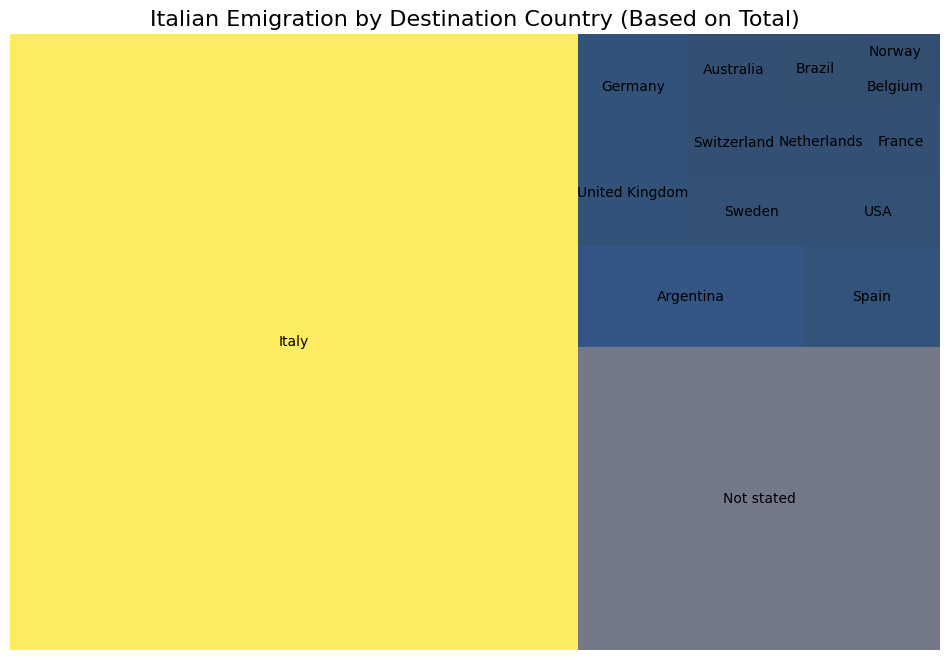

In [11]:


# Use the new method to get the colormap
cmap = plt.colormaps.get_cmap('cividis')  # You can also try 'plasma', 'cividis', etc.

# Normalize the 'Total' values to map to the colormap
norm = plt.Normalize(vmin=min(sorted_df['Total']), vmax=max(sorted_df['Total']))
colors = [cmap(norm(value)) for value in sorted_df['Total']]

# Create the treemap with the new color scheme
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sorted_df['Total'], label=sorted_df['Destination Country'], color=colors, alpha=0.8)

# Add title and display
plt.title('Italian Emigration by Destination Country (Based on Total)', fontsize=16)
plt.axis('off')  # Remove axes for clarity
plt.show()


In [12]:
# After sorting and resetting the index, drop the 'Total' column once
sorted_df.drop(columns=['Total'], inplace=True)


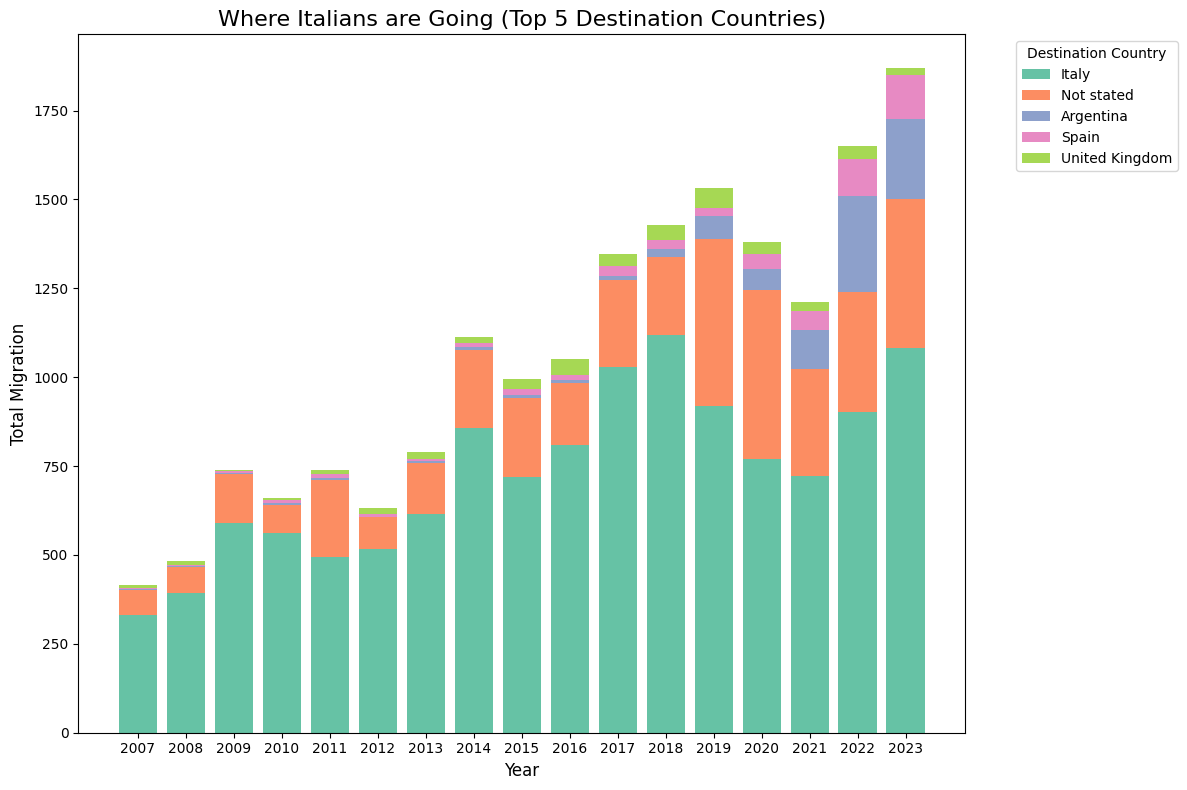

In [13]:
# Define the years (2007-2023) as integers
years = [i for i in range(2007, 2024)]

# Calculate the total migration per destination across all years
sorted_df['Total'] = sorted_df[years].sum(axis=1)

# Get the top 5 destination countries based on total migration
top_5_destinations = sorted_df.nlargest(5, 'Total')

# Define a visually distinct color palette (for top 5 destinations)
colors = plt.colormaps.get_cmap('Set2')  # Tab10 provides up to 10 distinct colors

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot stacked bars for each year
bottom_values = np.zeros(len(years))  # Initialize bottom values for stacking

for i, destination in enumerate(top_5_destinations['Destination Country']):
    plt.bar(years, top_5_destinations[top_5_destinations['Destination Country'] == destination][years].sum(), 
            bottom=bottom_values, color=colors(i), label=destination)
    # Update bottom values for stacking the next destination on top
    bottom_values += top_5_destinations[top_5_destinations['Destination Country'] == destination][years].sum()

# Add labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Migration', fontsize=12)
plt.title('Where Italians are Going (Top 5 Destination Countries)', fontsize=16)

# Force x-axis ticks to be integers (years)
plt.xticks(years, [str(year) for year in years])  # Convert years to strings to avoid float formatting

# Add legend
plt.legend(title='Destination Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


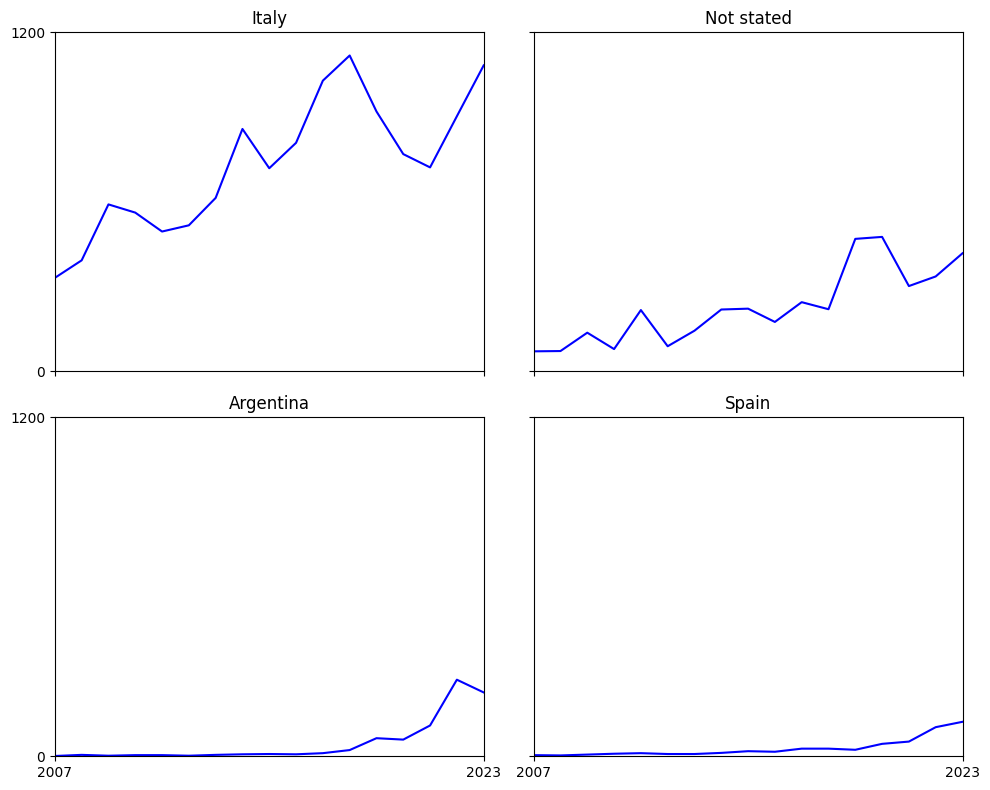

In [14]:
# Create subplots arranged in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)

# Flatten axes to easily iterate over them
axes = axes.flatten()

# Get the top 4 destination countries based on total migration
top_4_destinations = sorted_df.nlargest(4, 'Total')

# Plot for each of the top 4 destinations
for i, destination in enumerate(top_4_destinations['Destination Country']):
    ax = axes[i]
    # Plot the trend line (blue) for each destination without dots
    ax.plot(years, top_4_destinations[top_4_destinations['Destination Country'] == destination][years].values.flatten(), 
            color='blue')

    # Set title for each subplot with the destination name
    ax.set_title(destination)

    # Set x-axis to only show 2007 and 2023, with labels
    ax.set_xticks([2007, 2023])
    ax.set_xticklabels([2007, 2023])

    # Add 0 and 1200 to y-axis, with labels
    ax.set_yticks([0, 1200])
    ax.set_yticklabels([0, 1200])

# Set a common scale for all subplots (same x and y limits)
plt.xlim([2007, 2023])
plt.ylim([0, 1200])

# Add a tight layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


Let's take a look at net migration for Italians, as in, total immigration figures compared to emigration


In [15]:
italian_in_df = pd.read_csv('italians arriving.csv', delimiter=';', header=None, encoding='ISO-8859-1')

year_columns = {i: 2006 + i for i in range(1, 18)}  # 1 corresponds to 2007, 17 to 2023


italian_in_df.rename(columns=year_columns, inplace=True)

# Drop the 'citizenship' column (which is the first one)
italian_in_df.drop(columns=[0], inplace=True)

# Adding 'Migration' column with the value 'immigration'
italian_in_df['Migration'] = 'immigration'

# Rearrange columns so 'Migration' is the first column
italian_in_df = italian_in_df[['Migration'] + list(italian_in_df.columns[:-1])]


In [16]:

italian_out_df = pd.read_csv('italian out.csv', header=None, encoding='ISO-8859-1')


year_columns = {i: 2006 + i for i in range(1, 18)}  # 1 corresponds to 2007, 17 to 2023

italian_out_df.rename(columns=year_columns, inplace=True)
# Adding 'Migration' column with the value 'emigration'
italian_out_df['Migration'] = 'emigration'

# Rearrange columns so 'Migration' is the first column
italian_out_df = italian_out_df[['Migration'] + list(italian_out_df.columns[:-1])]

italy_combined_df = pd.concat([italian_in_df, italian_out_df], ignore_index=True)
italy_combined_df

,Migration,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,0
0,immigration,866,928,998,1094,1122,1347,1597,2050,2064,2091,2122,2239,2453,2291,3292,3978,3432,NaN
1,emigration,460,540,800,741,827,731,919,1278,1160,1256,1608,1716,1821,1635,1480,2057,2306,Italy


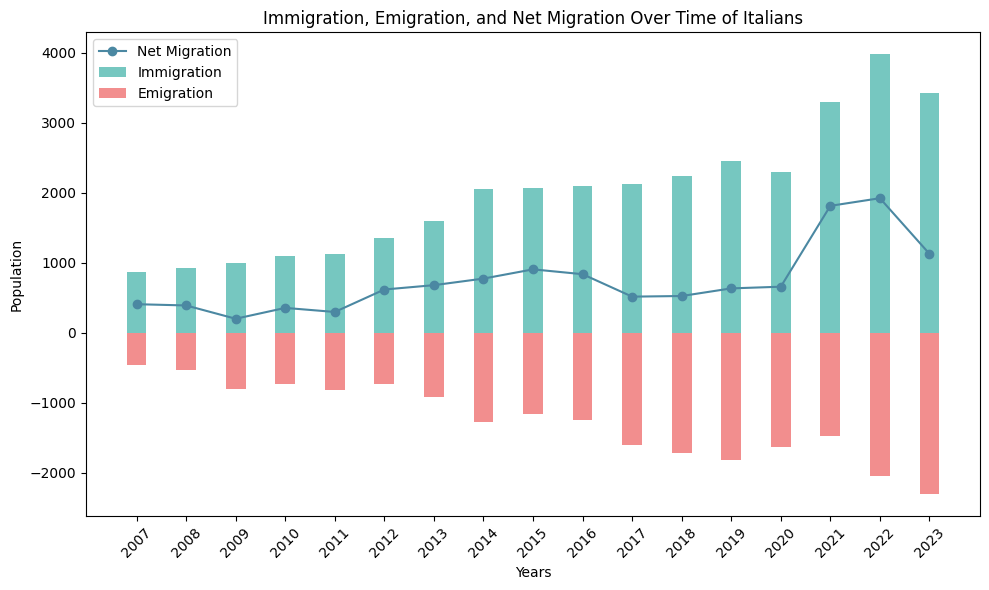

In [17]:
combined_df = italy_combined_df
years_columns = combined_df.columns[1:18]  # Exclude 'Migration' 

# Separate immigration and emigration rows
immigration_df = combined_df[combined_df['Migration'] == 'immigration']
emigration_df = combined_df[combined_df['Migration'] == 'emigration']

# Calculate net migration: immigration - emigration
net_migration_values = immigration_df[years_columns].iloc[0] - emigration_df[years_columns].iloc[0]

# Set positions for the bars
years = np.arange(len(years_columns))

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot immigration as positive bars
ax.bar(years, immigration_df[years_columns].iloc[0], width=0.4, label='Immigration', color='#76c7c0')

# Plot emigration as negative bars
ax.bar(years, -emigration_df[years_columns].iloc[0], width=0.4, label='Emigration', color='#f28e8e')

# Plot net migration as a line on top
ax.plot(years, net_migration_values, label='Net Migration', color='#4b88a2', marker='o')

# Adding labels and title
ax.set_xlabel('Years')
ax.set_ylabel('Population')
ax.set_title('Immigration, Emigration, and Net Migration Over Time of Italians')
ax.set_xticks(years)
ax.set_xticklabels(years_columns, rotation=45)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

Not many Italians are staying in Denmark. What is going on with Argentina though?

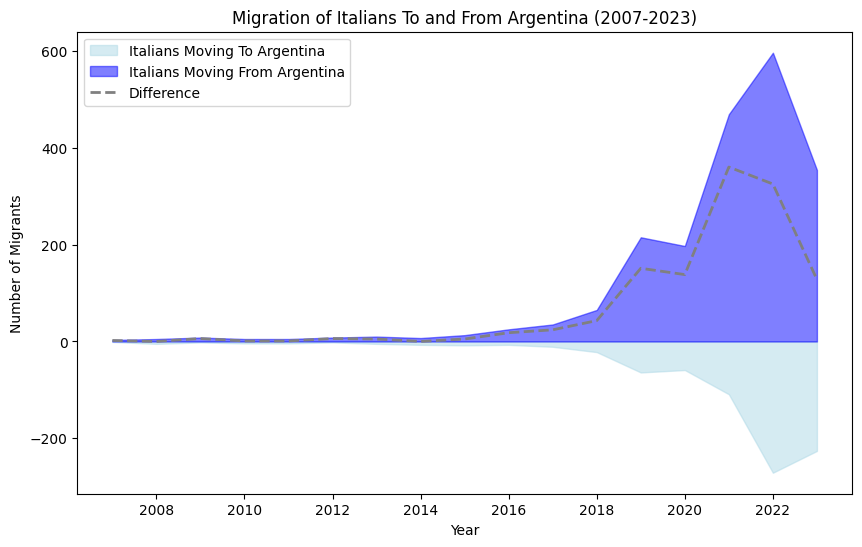

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Years from 2007 to 2023
years = [i for i in range(2007, 2024)]

# Italians moving from Argentina (2007-2023)
from_argentina = [3, 5, 8, 5, 5, 8, 10, 7, 13, 25, 35, 65, 215, 197, 469, 596, 354]

# Italians moving to Argentina (2007-2023) - negative
to_argentina = [-1, -5, -2, -4, -4, -2, -5, -7, -8, -7, -11, -22, -64, -59, -109, -271, -226]

# Calculate net migration (from - to)
net_migration = np.array(from_argentina) + np.array(to_argentina)

# Create the area chart
plt.figure(figsize=(10, 6))
plt.fill_between(years, to_argentina, color="lightblue", alpha=0.5, label="Italians Moving To Argentina")
plt.fill_between(years, from_argentina, color="blue", alpha=0.5, label="Italians Moving From Argentina")

# Plot the net migration as a grey line
plt.plot(years, net_migration, color="grey", linewidth=2, linestyle="--", label="Difference")

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Migrants')
plt.title('Migration of Italians To and From Argentina (2007-2023)')
plt.legend()

# Display the chart
plt.show()




Argentina has a huge Italian diaspora, 62% of the population of Argentina have Italian heritage. A lot of them have dual citizenship, and of course it is easier to move to Denmark on an EU passport.